# K-Nearest Neighbors Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### The Model

In [2]:
def knn_classifier(X_train, y_train, X_test, k=10):
    '''Returns the class prediction for every example in the X_test by taking
    majority votes of the predictions of the k Nearest Neighbors in X_train.
    '''
    y_cap_test = np.zeros((X_test.shape[0], 1))
    
    for i, x_query in enumerate(X_test):
        
        distances = np.linalg.norm(X_train - x_query, axis=1).flatten()
        indices = np.argsort(distances)
        
        candidates = []
        current_k = k
        
        # If the candidates for label are more than 1 then we check k - 1
        # neighbors until we get a single candidate or k becomes 1 in which
        # it is impossible to get more than 1 candidate.
        
        while not candidates or len(candidates) > 1:
        
            knn_labels = y_train[indices[:current_k], 0]
            label_counts = Counter(knn_labels)
            max_count = max(label_counts.values())
            # Checking for tie
            candidates = [label for label, count in label_counts.items() if 
                          count == max_count]
            current_k -= 1
            
        y_cap_test[i, 0] = candidates[0]
        
    return y_cap_test


def k_fold_cross_validation(X, y, k_list_for_knn, k=10):
    
    m = X.shape[0]                            # No. of examples
    n = X.shape[1]                            # No. of features
    
    validation_accuracies = []
    
    for k_for_knn in k_list_for_knn:
        
        validation_accuracy = 0
        
        for i in range(k):
            
            start = (m * i) // k
            end = (m * (i + 1)) // k-1
            
            X_valid = X[start:end+1, :]
            y_valid = y[start:end+1, :]
            
            X_train = np.append(X[:start, :], X[end+1:, :], axis=0)
            y_train = np.append(y[:start, :], y[end+1:, :], axis=0)
            
            y_cap_valid = knn_classifier(X_train, y_train, X_valid, k_for_knn)
            
            validation_accuracy += accuracy(y_valid, y_cap_valid)
            
        validation_accuracy /= k
        validation_accuracies.append(validation_accuracy)
    
    return validation_accuracies



def accuracy(y, y_cap):
    
    return 100 * np.sum(y == y_cap) / y.shape[0]

### Iris Data

In [3]:
df = pd.read_csv('data/iris.csv', header=None, names=['sepal length',
                                                      'sepal width',
                                                      'petal length',
                                                      'petal width', 'class'])
df.iloc[np.random.randint(0, len(df), 10)]

,sepal length,sepal width,petal length,petal width,class
131,7.9,3.8,6.4,2.0,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor


#### Adding a column of label to represent class number

In [4]:
class_to_label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 
                      'Iris-virginica': 2}
df['label'] = df['class'].map(lambda x: class_to_label_dict[x])
df.iloc[np.random.randint(0, len(df), 10)]

,sepal length,sepal width,petal length,petal width,class,label
65,6.7,3.1,4.4,1.4,Iris-versicolor,1
66,5.6,3.0,4.5,1.5,Iris-versicolor,1
76,6.8,2.8,4.8,1.4,Iris-versicolor,1
58,6.6,2.9,4.6,1.3,Iris-versicolor,1
87,6.3,2.3,4.4,1.3,Iris-versicolor,1
20,5.4,3.4,1.7,0.2,Iris-setosa,0
16,5.4,3.9,1.3,0.4,Iris-setosa,0
61,5.9,3.0,4.2,1.5,Iris-versicolor,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
1,4.9,3.0,1.4,0.2,Iris-setosa,0


#### Using two features only just for the sake of visualization

In [5]:
X = np.array(df[['sepal width', 'sepal length']])
y = np.array(df['label']).reshape(-1,1)

#### Train Test Split and normalization

In [6]:
train_size = int(0.8*X.shape[0])
random_indices = np.random.permutation(X.shape[0])
X_train = X[random_indices[:train_size], :]
X_test = X[random_indices[train_size:], :]
y_train = y[random_indices[:train_size], :]
y_test = y[random_indices[train_size:], :]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means) / stds

(120, 2) (30, 2) (120, 1) (30, 1)


#### Visualizing Training Data

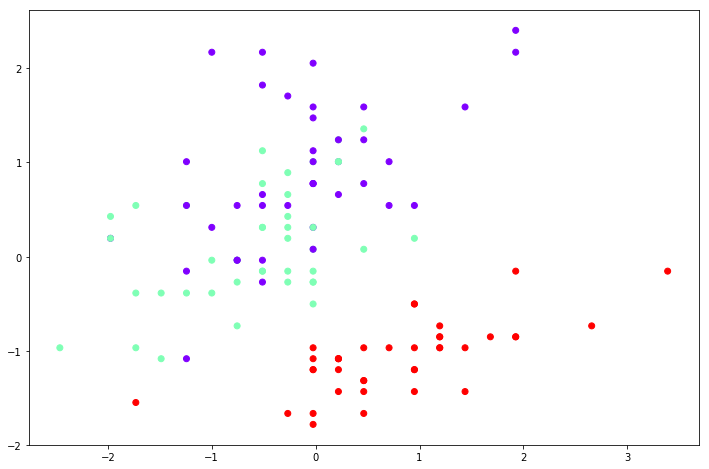

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.rainbow_r)

Three different colors represent the class labels

#### Visualizing Test Data with true labels

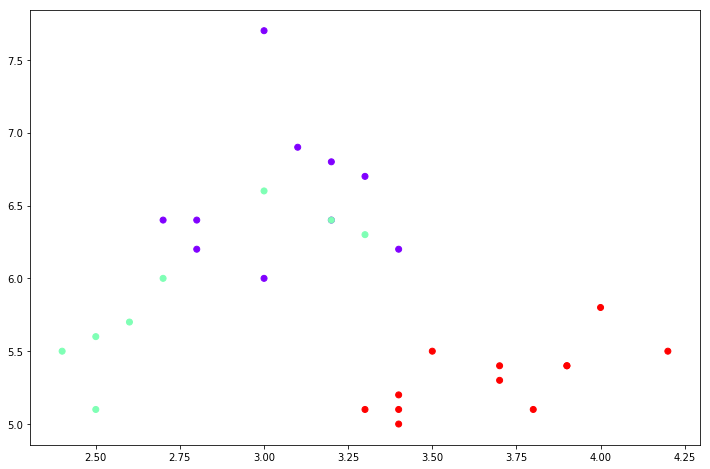

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test[:,0], cmap=plt.cm.rainbow_r)

#### Predicting test labels using two features

In [9]:
y_cap_test = knn_classifier(X_train, y_train, (X_test - means) / stds, k=5)
accuracy(y_test, y_cap_test)

73.33333333333333

#### Predicted Labels vs True Labels for test Data

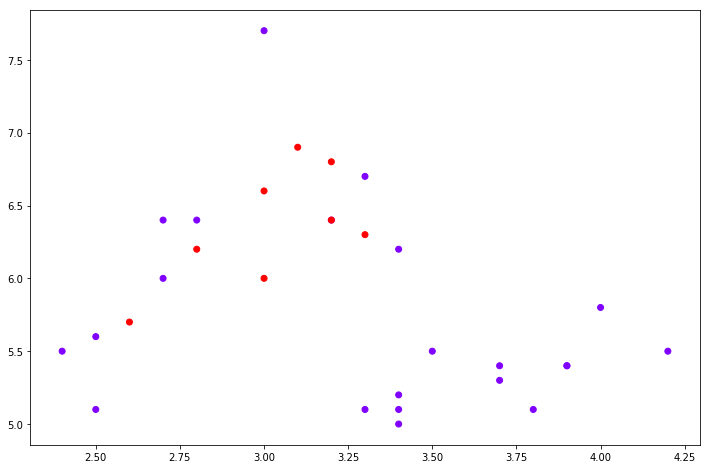

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_cap_test[:,0] == y_test[:,0],
            cmap=plt.cm.rainbow_r)

Red color examples are predicted wrongly

### Using all features

In [11]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = np.array(df[features])
y = np.array(df['label']).reshape(-1,1)

train_size = int(0.8*X.shape[0])
random_indices = np.random.permutation(X.shape[0])
X_train = X[random_indices[:train_size], :]
X_test = X[random_indices[train_size:], :]
y_train = y[random_indices[:train_size], :]
y_test = y[random_indices[train_size:], :]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means) / stds

(120, 4) (30, 4) (120, 1) (30, 1)


#### Finding best value of k by k-fold cross validation

In [15]:
k_list = np.arange(1, 10)
validation_accuracies = k_fold_cross_validation(X_train, y_train, k_list)

In [16]:
k_list[np.argmax(validation_accuracies)]

1

#### Predicting test set labels with best value of k

In [17]:
y_cap_test = knn_classifier(X_train, y_train, (X_test - means) / stds,
                            k = k_list[np.argmax(validation_accuracies)])
accuracy(y_test, y_cap_test)

86.66666666666667

Cant Visualize this time